In [2]:
%pip install matplotlib

  Using cached matplotlib-3.8.2-cp311-cp311-macosx_10_12_x86_64.whl.metadata (5.8 kB)
  Using cached contourpy-1.2.0-cp311-cp311-macosx_10_9_x86_64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 2.8 MB/s eta 0:00:0000:01
  Using cached kiwisolver-1.4.5-cp311-cp311-macosx_10_9_x86_64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.8.2-cp311-cp311-macosx_10_12_x86_64.whl (7.6 MB)
Using cached contourpy-1.2.0-cp311-cp311-macosx_10_9_x86_64.whl (258 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 20.0 MB/s eta 0:00:00a 0:00:01
Using cached kiwisolver-1.4.5-cp311-cp311-macosx_10_9_x86_64.whl (68 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 12.0 MB/s eta 0:00:0000:0100:01
Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)

[notice] A new release of 

In [34]:
%pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 4.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [72]:
import pandas as pd
# from matplotlib import pyplot as plt
from sklearn.inspection import PartialDependenceDisplay, partial_dependence
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [73]:
# PartialDependenceDisplay works with Scikit-Learn 1.0>. Needs newer Python3 versions
import sys
print(sys.version)

3.11.6 (main, Nov  2 2023, 04:52:24) [Clang 14.0.3 (clang-1403.0.22.14.1)]


In [74]:
data = pd.read_csv("heart.csv")

In [75]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Now, we manually make the dataset imbalanced. The ML models will collapse to predicting the majority class correctly.

array([[<Axes: title={'center': 'HeartDisease'}>]], dtype=object)

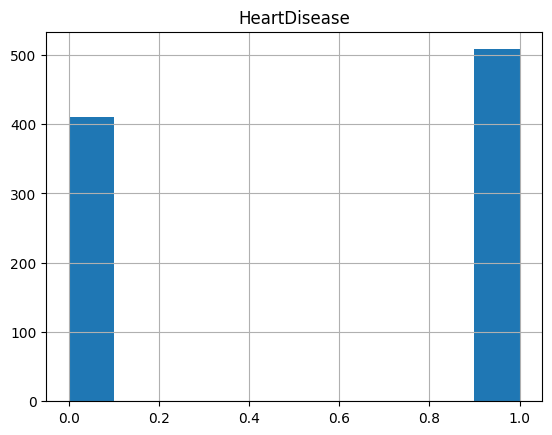

In [76]:
# Manually make the dataset imbalanced
data.hist(column='HeartDisease')

In [77]:
majority = data[data['HeartDisease'] == 0]
majority.shape[0]

410

In [78]:
minority = data[data['HeartDisease'] == 1].sample(n=41)

In [79]:
merged = pd.concat([majority, minority]).sample(frac=1)

array([[<Axes: title={'center': 'HeartDisease'}>]], dtype=object)

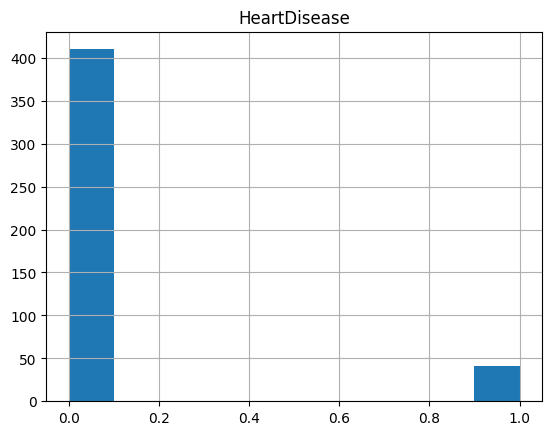

In [80]:
merged.hist(column='HeartDisease')

We reset the dataset here.

In [100]:
data = merged

In [101]:
categorical_cols = ['Sex', 'ChestPainType', "RestingECG", "ExerciseAngina", "ST_Slope"]

In [102]:
label_encoder = LabelEncoder()

for c in categorical_cols:
    data[c+"Encoded"] = label_encoder.fit_transform(data[c])

In [103]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,SexEncoded,ChestPainTypeEncoded,RestingECGEncoded,ExerciseAnginaEncoded,ST_SlopeEncoded
653,42,M,NAP,130,180,0,Normal,150,N,0.0,Up,0,1,2,1,0,2
416,63,M,ASY,140,260,0,ST,112,Y,3.0,Flat,1,1,0,2,1,1
771,55,M,ASY,140,217,0,Normal,111,Y,5.6,Down,1,1,0,1,1,0
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1,1,1,0,2
39,48,F,ASY,150,227,0,Normal,130,Y,1.0,Flat,0,0,0,1,1,1


In [104]:
numerical_cols = ["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"]

In [105]:
scaler = MinMaxScaler()

for c in numerical_cols:
    data[c+"_normalized"] = scaler.fit_transform(data[[c]])


In [106]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,ChestPainTypeEncoded,RestingECGEncoded,ExerciseAnginaEncoded,ST_SlopeEncoded,Age_normalized,RestingBP_normalized,Cholesterol_normalized,FastingBS_normalized,MaxHR_normalized,Oldpeak_normalized
653,42,M,NAP,130,180,0,Normal,150,N,0.0,...,2,1,0,2,0.291667,0.454545,0.319149,0.0,0.609023,0.164179
416,63,M,ASY,140,260,0,ST,112,Y,3.0,...,0,2,1,1,0.729167,0.545455,0.460993,0.0,0.323308,0.611940
771,55,M,ASY,140,217,0,Normal,111,Y,5.6,...,0,1,1,0,0.562500,0.545455,0.384752,0.0,0.315789,1.000000
0,40,M,ATA,140,289,0,Normal,172,N,0.0,...,1,1,0,2,0.250000,0.545455,0.512411,0.0,0.774436,0.164179
39,48,F,ASY,150,227,0,Normal,130,Y,1.0,...,0,1,1,1,0.416667,0.636364,0.402482,0.0,0.458647,0.313433


In [107]:
X = data[[c + 'Encoded' for c in categorical_cols] + [c + "_normalized" for c in numerical_cols]]

In [108]:
y = data['HeartDisease']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier with your data
clf.fit(X_train, y_train)

# Make predictions
predictions = clf.predict(X_test)

In [111]:
accuracy_score(y_test, predictions)

0.9120879120879121

In [112]:
cm = confusion_matrix(y_test, predictions)

In [113]:
# Print the confusion matrix
print(cm)

[[79  3]
 [ 5  4]]


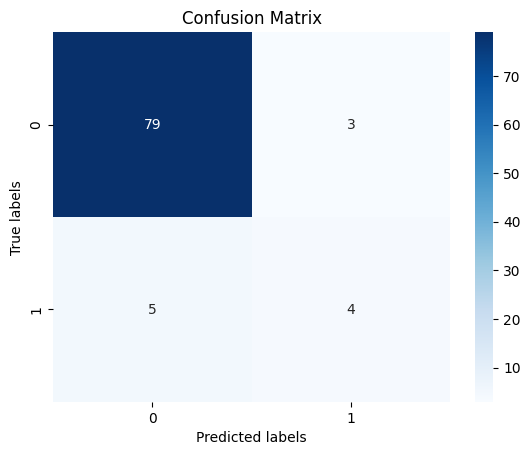

In [114]:
# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

Now, we analyze each numerical feature's impact on our predictions

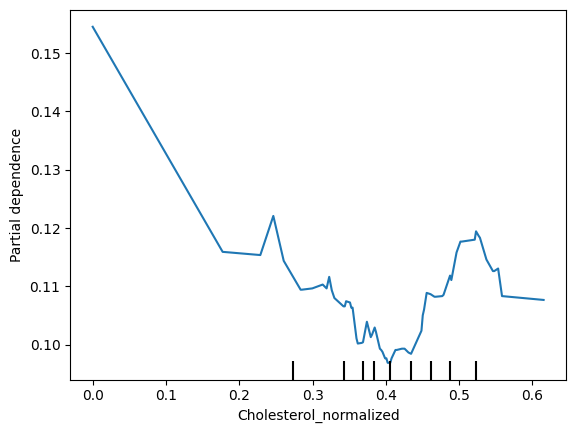

In [121]:
feature_to_plot = 'Cholesterol_normalized'
disp1 = PartialDependenceDisplay.from_estimator(clf, X_test, [feature_to_plot])
plt.show()

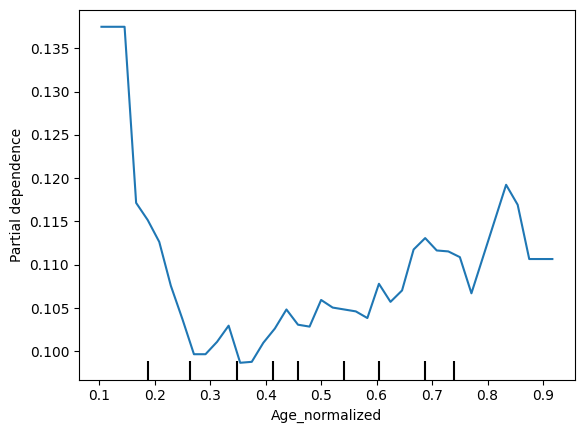

In [116]:
feature_to_plot = 'Age_normalized'
disp2 = PartialDependenceDisplay.from_estimator(clf, X_test, [feature_to_plot])
plt.show()

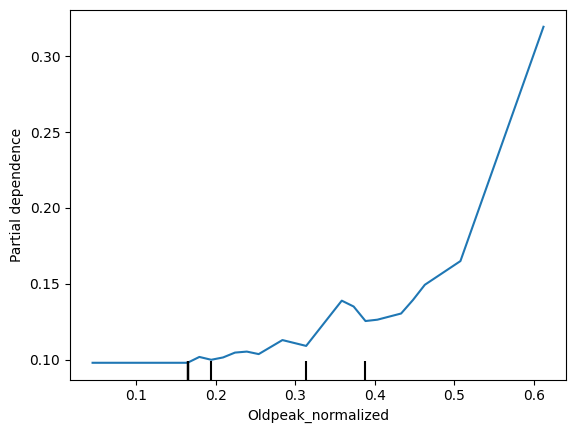

In [117]:
feature_to_plot = 'Oldpeak_normalized'
disp3 = PartialDependenceDisplay.from_estimator(clf, X_test, [feature_to_plot])
plt.show()

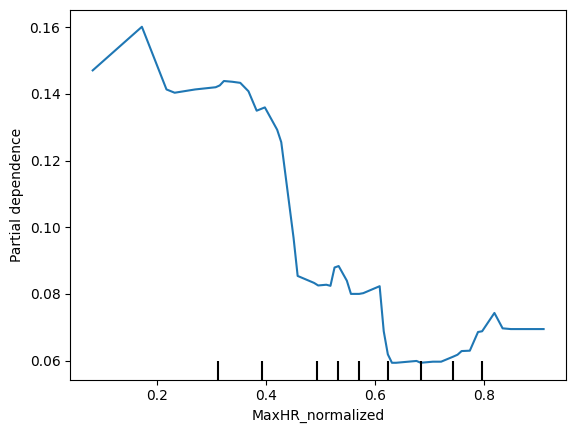

In [118]:
feature_to_plot = 'MaxHR_normalized'
dispd4 = PartialDependenceDisplay.from_estimator(clf, X_test, [feature_to_plot])
plt.show()

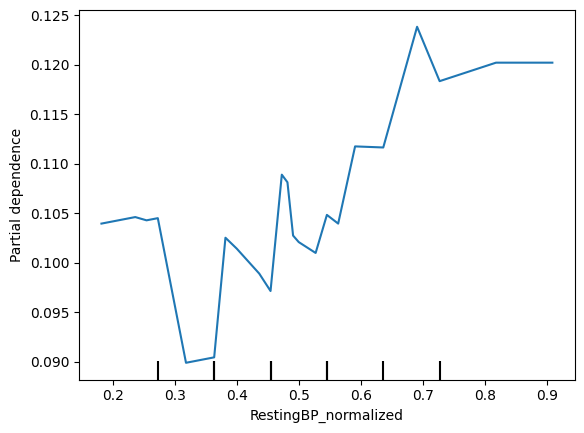

In [119]:
feature_to_plot = 'RestingBP_normalized'
dispd5 = PartialDependenceDisplay.from_estimator(clf, X_test, [feature_to_plot])
plt.show()

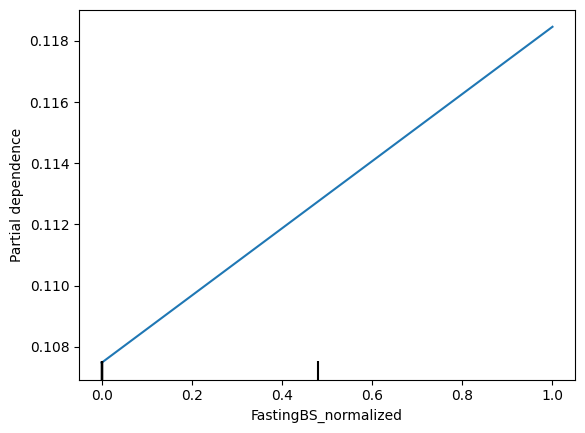

In [120]:
feature_to_plot = 'FastingBS_normalized'
dispd6 = PartialDependenceDisplay.from_estimator(clf, X_test, [feature_to_plot])
plt.show()